In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_json('ultimate_data_challenge.json')

In [103]:
#convert dates to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [104]:
#creates a column that is 1 if the user was active in the last 30 days
df['active'] = (df['last_trip_date'] >= '2014-06-01').astype(int)

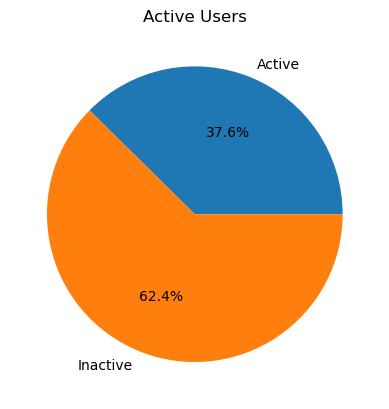

In [131]:
#creates a pie chart of the percentage of users that are active
active = df['active'].sum()
inactive = len(df) - active
plt.pie([active, inactive], labels=['Active', 'Inactive'], autopct='%1.1f%%')
plt.title('Active Users')
plt.savefig('active_users.png')

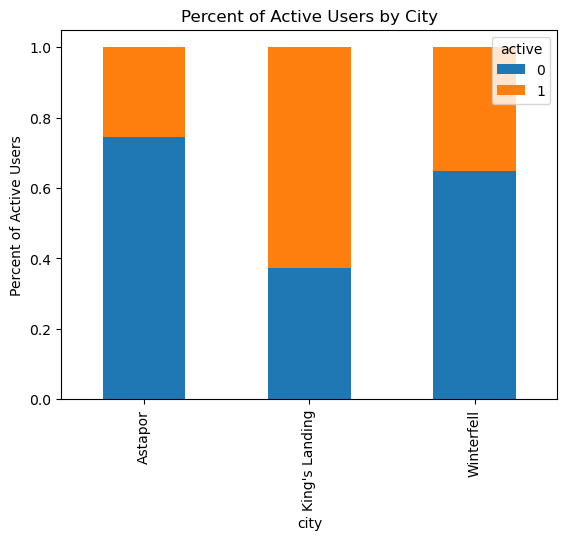

In [105]:
#groub by city and charts on the active users
city_group = df.groupby('city')['active'].value_counts(normalize=True).unstack()
city_group.plot(kind='bar', stacked='True')
plt.title('Percent of Active Users by City')
plt.ylabel('Percent of Active Users')
plt.savefig('active_users_by_city.png')

In [106]:
#one hot encodes and drops the columns that are not needed
one_hot_df = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'],dtype=int)
one_hot_df = one_hot_df.drop(['last_trip_date', 'signup_date'], axis=1)


In [107]:
one_hot_df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.050388,-0.136329,-0.039115,0.210463,-0.061075,0.024650,0.037735,-0.059309,0.058342,-0.112210,0.112210
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,0.014630,0.034509,0.123175,-0.011653,0.032699,0.088392,-0.103100,0.026729,-0.026864,0.002086,-0.002086
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.110071,-0.081491,0.010597,-0.003333,0.037172,-0.009198,-0.027643,-0.008977,0.011104,0.078791,-0.078791
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.144918,-0.104414,0.020103,0.011797,0.045457,0.028221,-0.065603,-0.010150,0.012851,0.106861,-0.106861
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,1.000000,0.101652,0.020442,0.009693,-0.010540,0.031349,-0.015318,-0.009241,0.006726,-0.035998,0.035998
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.101652,1.000000,0.080540,-0.092780,-0.045431,0.015877,0.030050,0.020888,-0.025030,-0.032310,0.032310
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.020442,0.080540,1.000000,-0.026791,0.032580,0.084648,-0.098929,0.008783,-0.010148,-0.009343,0.009343
active,0.210463,-0.011653,-0.003333,0.011797,0.009693,-0.092780,-0.026791,1.000000,-0.174655,0.262284,-0.046611,-0.225464,0.225244,-0.205002,0.205002
city_Astapor,-0.061075,0.032699,0.037172,0.045457,-0.010540,-0.045431,0.032580,-0.174655,1.000000,-0.354298,-0.657563,0.025642,-0.024539,-0.021259,0.021259
city_King's Landing,0.024650,0.088392,-0.009198,0.028221,0.031349,0.015877,0.084648,0.262284,-0.354298,1.000000,-0.471555,-0.059203,0.060520,-0.039649,0.039649


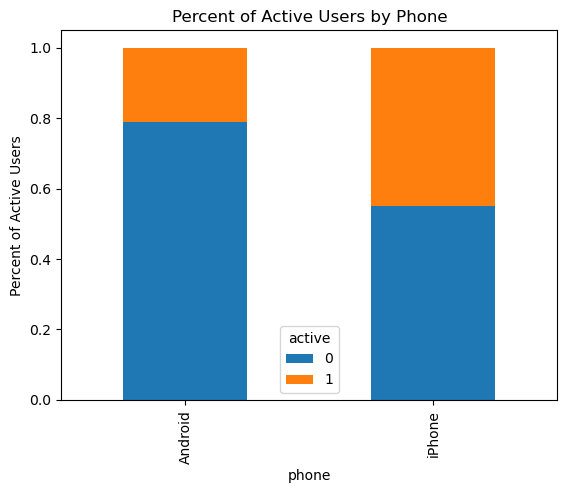

In [108]:
#plots percent of active users by phone
phone_group = df.groupby('phone')['active'].value_counts(normalize=True).unstack()
phone_group.plot(kind='bar', stacked='True')
plt.title('Percent of Active Users by Phone')
plt.ylabel('Percent of Active Users')
plt.savefig('active_users_by_phone.png')

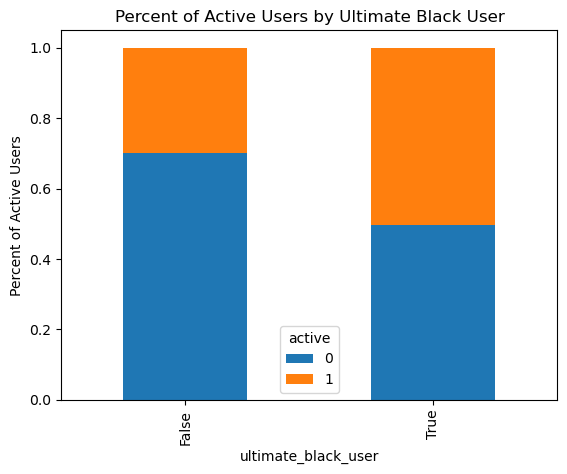

In [109]:
#plots percent of active users by ultimate black user
black_user_group = df.groupby('ultimate_black_user')['active'].value_counts(normalize=True).unstack()
black_user_group.plot(kind='bar', stacked='True')
plt.title('Percent of Active Users by Ultimate Black User')
plt.ylabel('Percent of Active Users')
plt.savefig('active_users_by_black_user.png')

In [117]:
#changes Nan values to 0
one_hot_df['avg_rating_by_driver'] = one_hot_df['avg_rating_by_driver'].fillna(0)
one_hot_df['avg_rating_of_driver'] = one_hot_df['avg_rating_of_driver'].fillna(0)

In [124]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
one_hot_df = pd.DataFrame(scaler.fit_transform(one_hot_df), columns=one_hot_df.columns)

In [118]:
#creates a train test split
X = one_hot_df.drop('active', axis=1)
y = one_hot_df['active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#creates a random forest classifier
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'n_estimators': 200}
0.78325


Text(0.5, 0, 'Importance')

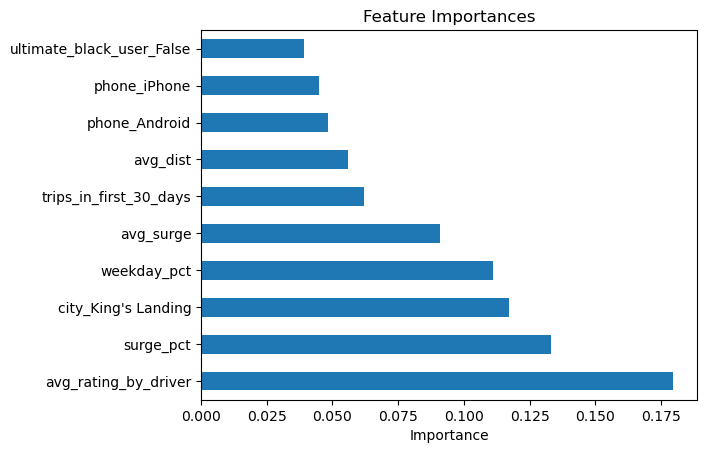

In [127]:
#plots the feature importances
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.savefig('feature_importances.png')